# Netflix Movie Recommendation System - Analysis Notebook

**Created by**: MOHIT KUMAR CHAURASIYA 
**University**: BBD University (B.Tech CSE-CC&ML)  
**Project**: Netflix Analytics & Recommendation System

This notebook provides step-by-step analysis and demonstrates the recommendation algorithms.

## 1. Import Libraries and Load Data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('netflix_movies_dataset.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully!
Shape: (5000, 19)


,movie_id,title,director,genre,release_year,country,language,duration_minutes,content_rating,imdb_rating,netflix_rating,total_views,date_added_to_netflix,is_netflix_original,budget_millions,box_office_millions,profit_millions,years_on_netflix,rating_category
0,NF0001,Lost Code,Denis Villeneuve,Horror,2018,Canada,Spanish,155,TV-Y7,7.2,7.1,94805,2019-08-04,True,44.51,26.1,-18.41,5,Good
1,NF0002,Fear,Denis Villeneuve,War,2008,Thailand,Portuguese,80,PG-13,4.8,5.0,8140,2024-07-29,False,31.94,NaN,NaN,0,Poor
2,NF0003,Last Nightmare,Chloe Zhao,Fantasy,2011,India,Mandarin,148,PG,8.9,9.3,1851,2013-11-03,False,59.34,NaN,NaN,11,Excellent
3,NF0004,Star,Steven Spielberg,Adventure,2023,South Korea,Dutch,90,R,5.6,5.3,11346,2024-05-13,True,91.23,NaN,NaN,0,Average
4,NF0005,Sky,Jordan Peele,Comedy,2007,China,Japanese,148,R,6.9,5.9,39022,2018-04-21,True,54.72,NaN,NaN,6,Average


## 2. Exploratory Data Analysis (EDA)

In [15]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_id               5000 non-null   object 
 1   title                  5000 non-null   object 
 2   director               5000 non-null   object 
 3   genre                  5000 non-null   object 
 4   release_year           5000 non-null   int64  
 5   country                5000 non-null   object 
 6   language               5000 non-null   object 
 7   duration_minutes       5000 non-null   int64  
 8   content_rating         5000 non-null   object 
 9   imdb_rating            5000 non-null   float64
 10  netflix_rating         5000 non-null   float64
 11  total_views            5000 non-null   int64  
 12  date_added_to_netflix  5000 non-null   object 
 13  is_netflix_original    5000 non-null   bool   
 14  budget_millions        3394 non-null   flo

,release_year,duration_minutes,imdb_rating,netflix_rating,total_views,budget_millions,box_office_millions,profit_millions,years_on_netflix
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,3394.000000,3021.000000,2049.000000,5000.000000
mean,2014.069400,129.785600,6.470320,6.462300,64820.831800,101.784402,404.673952,291.907384,4.431000
std,6.054545,29.270528,1.495055,1.562628,68151.191686,57.108220,229.003802,236.708496,3.978895
min,2004.000000,80.000000,1.000000,1.000000,9.000000,1.060000,5.050000,-189.480000,-1.000000
25%,2009.000000,104.000000,5.500000,5.400000,18169.500000,53.490000,207.560000,95.180000,1.000000
50%,2014.000000,130.000000,6.500000,6.400000,44171.000000,101.765000,407.360000,287.820000,3.000000
75%,2019.000000,155.000000,7.500000,7.500000,87786.000000,150.560000,608.900000,490.760000,7.000000
max,2024.000000,180.000000,10.000000,10.000000,873605.000000,199.980000,799.530000,796.410000,14.000000


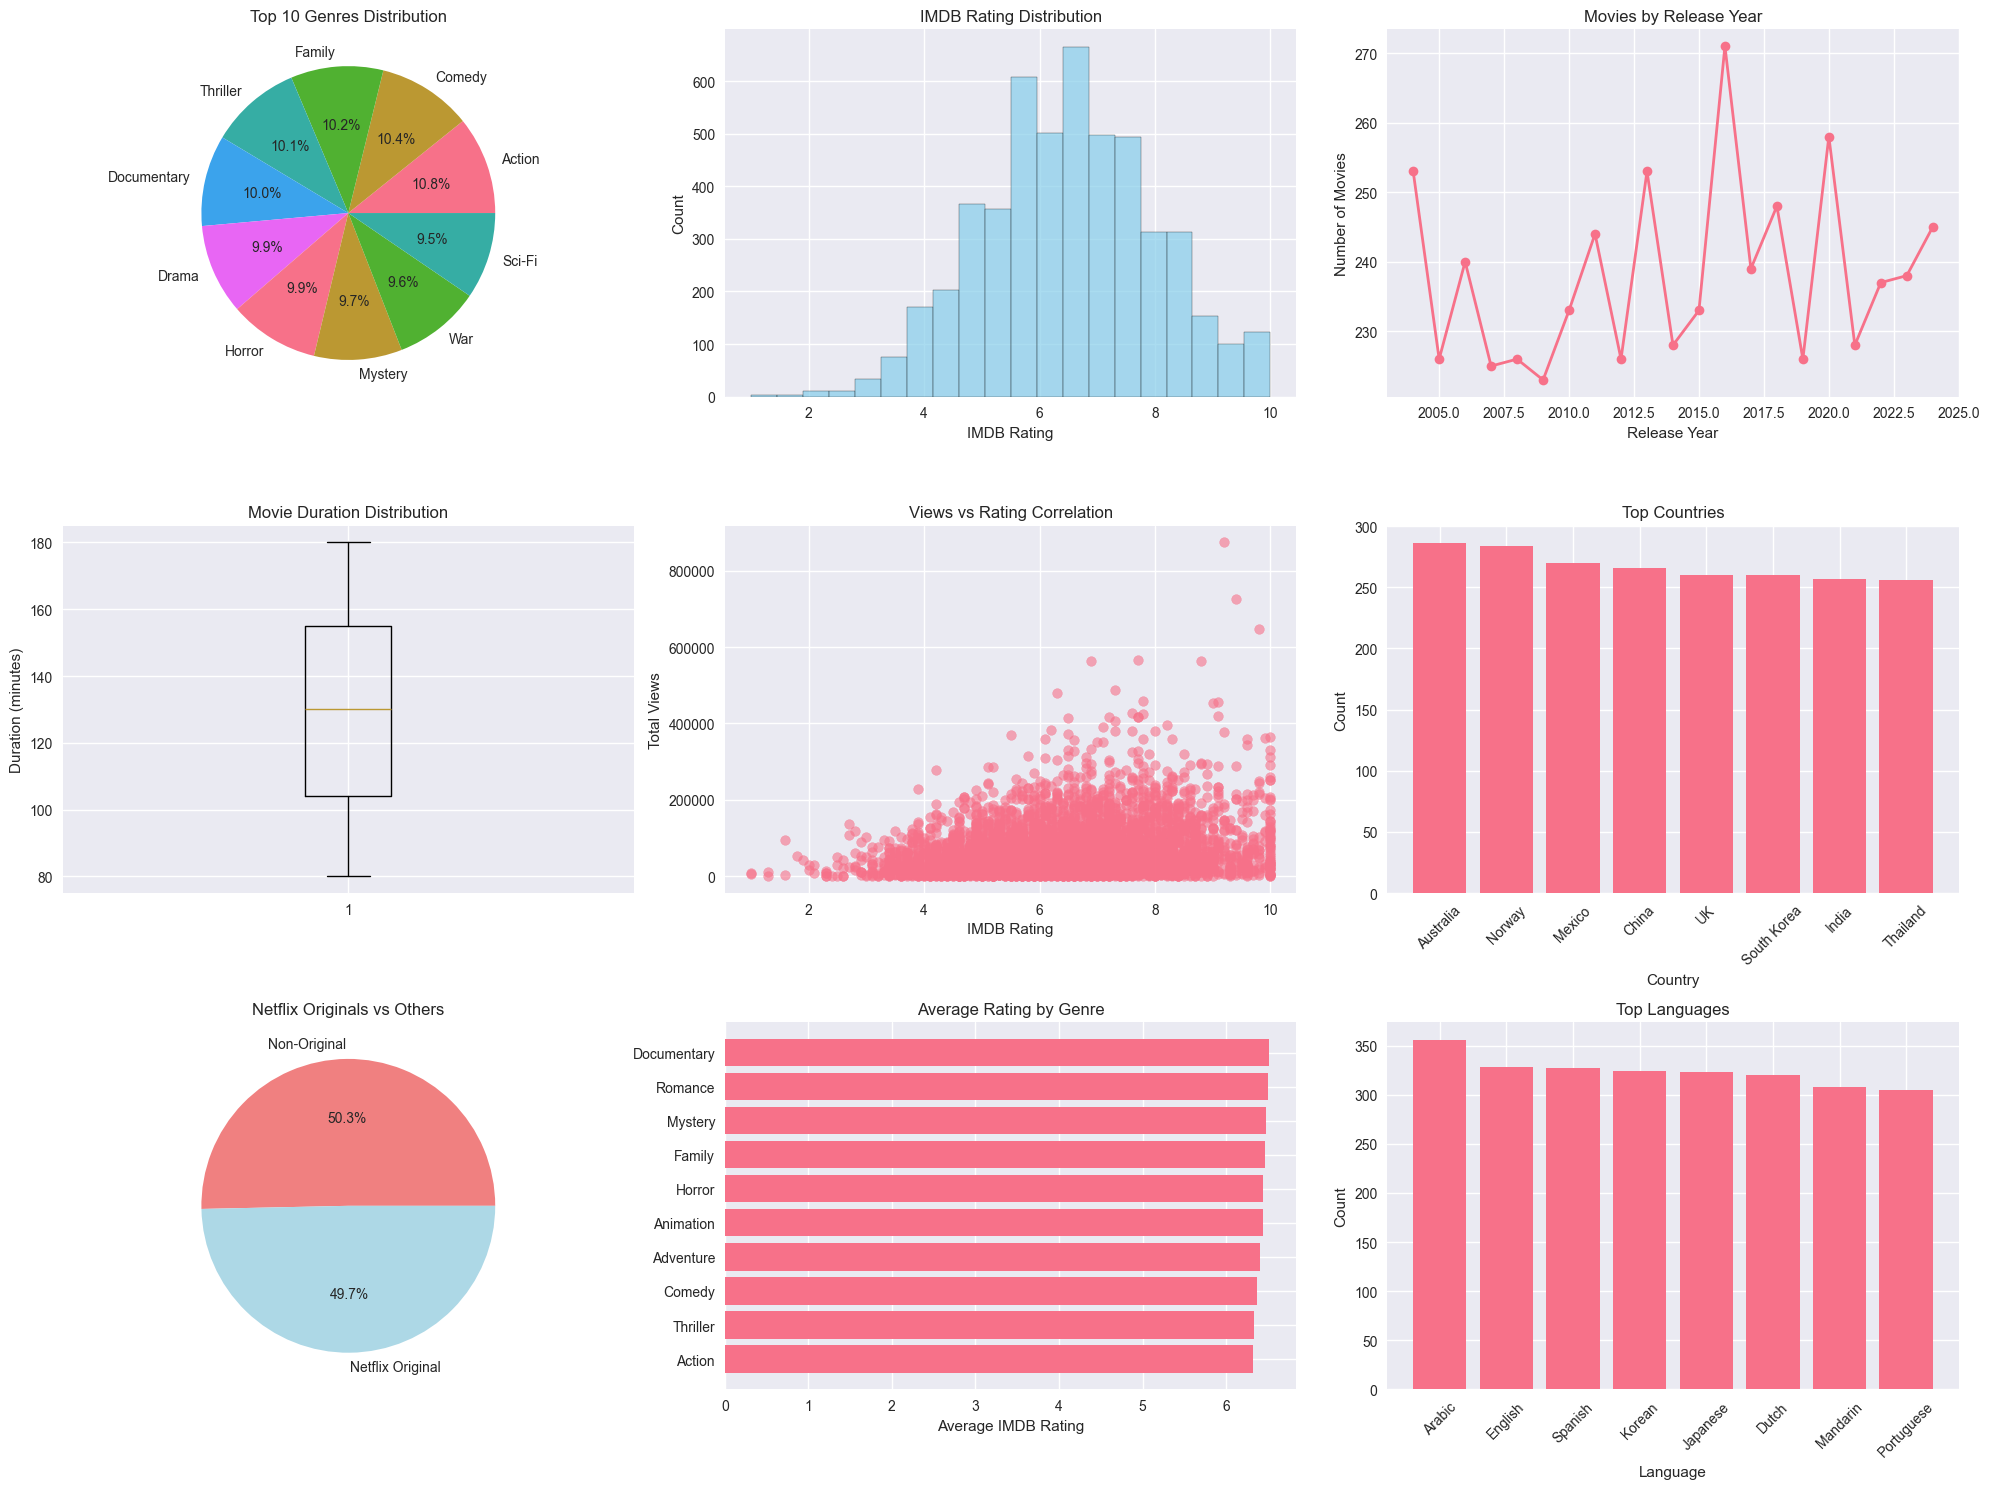

In [16]:
# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# 1. Genre distribution
genre_counts = df['genre'].value_counts().head(10)
axes[0,0].pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Top 10 Genres Distribution')

# 2. Rating distribution
axes[0,1].hist(df['imdb_rating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_xlabel('IMDB Rating')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('IMDB Rating Distribution')

# 3. Release year trend
year_counts = df['release_year'].value_counts().sort_index()
axes[0,2].plot(year_counts.index, year_counts.values, marker='o', linewidth=2)
axes[0,2].set_xlabel('Release Year')
axes[0,2].set_ylabel('Number of Movies')
axes[0,2].set_title('Movies by Release Year')

# 4. Duration analysis
axes[1,0].boxplot(df['duration_minutes'])
axes[1,0].set_ylabel('Duration (minutes)')
axes[1,0].set_title('Movie Duration Distribution')

# 5. Views vs Rating correlation
axes[1,1].scatter(df['imdb_rating'], df['total_views'], alpha=0.6)
axes[1,1].set_xlabel('IMDB Rating')
axes[1,1].set_ylabel('Total Views')
axes[1,1].set_title('Views vs Rating Correlation')

# 6. Country distribution
country_counts = df['country'].value_counts().head(8)
axes[1,2].bar(country_counts.index, country_counts.values)
axes[1,2].set_xlabel('Country')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Top Countries')
axes[1,2].tick_params(axis='x', rotation=45)

# 7. Netflix Originals vs Others
original_counts = df['is_netflix_original'].value_counts()
axes[2,0].pie(original_counts.values, labels=['Non-Original', 'Netflix Original'], 
              autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
axes[2,0].set_title('Netflix Originals vs Others')

# 8. Rating by Genre
genre_ratings = df.groupby('genre')['imdb_rating'].mean().sort_values(ascending=True).head(10)
axes[2,1].barh(genre_ratings.index, genre_ratings.values)
axes[2,1].set_xlabel('Average IMDB Rating')
axes[2,1].set_title('Average Rating by Genre')

# 9. Language distribution
lang_counts = df['language'].value_counts().head(8)
axes[2,2].bar(lang_counts.index, lang_counts.values)
axes[2,2].set_xlabel('Language')
axes[2,2].set_ylabel('Count')
axes[2,2].set_title('Top Languages')
axes[2,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Content-Based Recommendation System

In [17]:
# Create content features for similarity calculation
df['content_features'] = (
    df['genre'].astype(str) + ' ' +
    df['director'].astype(str) + ' ' +
    df['country'].astype(str) + ' ' +
    df['language'].astype(str) + ' ' +
    df['content_rating'].astype(str)
)

print("Sample content features:")
print(df[['title', 'content_features']].head())

Sample content features:
            title                                content_features
0       Lost Code    Horror Denis Villeneuve Canada Spanish TV-Y7
1            Fear  War Denis Villeneuve Thailand Portuguese PG-13
2  Last Nightmare            Fantasy Chloe Zhao India Mandarin PG
3            Star  Adventure Steven Spielberg South Korea Dutch R
4             Sky            Comedy Jordan Peele China Japanese R


In [18]:
# Build TF-IDF matrix and calculate similarity
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['content_features'])

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

# Calculate cosine similarity
content_similarity = cosine_similarity(tfidf_matrix)
print(f"Content Similarity Matrix Shape: {content_similarity.shape}")

# Show sample similarities
print(f"\nSample similarity scores for first movie:")
print(f"Movie: {df.iloc[0]['title']}")
similarities = list(enumerate(content_similarity[0]))
similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

for i, score in similarities[1:6]:  # Top 5 similar movies
    print(f"  {df.iloc[i]['title']}: {score:.3f}")

TF-IDF Matrix Shape: (5000, 98)
Content Similarity Matrix Shape: (5000, 5000)

Sample similarity scores for first movie:
Movie: Lost Code
  Peace: 0.728
  Fire: 0.690
  War: 0.689
  Moon: 0.665
  Tale: 0.584


## 4. Recommendation Function

In [19]:
def get_recommendations(movie_title, num_recommendations=5):
    """Get movie recommendations based on content similarity."""
    try:
        # Find the movie index
        movie_idx = df[df['title'].str.contains(movie_title, case=False, na=False)].index[0]
        movie_info = df.iloc[movie_idx]
        
        # Get similarity scores
        sim_scores = list(enumerate(content_similarity[movie_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get top recommendations
        recommendations = []
        for i, score in sim_scores[1:num_recommendations+1]:
            rec_movie = df.iloc[i]
            recommendations.append({
                'title': rec_movie['title'],
                'genre': rec_movie['genre'],
                'director': rec_movie['director'],
                'imdb_rating': rec_movie['imdb_rating'],
                'similarity_score': score
            })
            
        return movie_info, recommendations
        
    except IndexError:
        return None, f"Movie '{movie_title}' not found in dataset"

# Test the recommendation function
sample_movie = df.iloc[10]['title']
print(f"Getting recommendations for: '{sample_movie}'")

movie_info, recommendations = get_recommendations(sample_movie)

if movie_info is not None:
    print(f"\nOriginal Movie:")
    print(f"Title: {movie_info['title']}")
    print(f"Genre: {movie_info['genre']}")
    print(f"Director: {movie_info['director']}")
    print(f"Rating: {movie_info['imdb_rating']}/10")
    
    print(f"\nRecommended Movies:")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec['title']} ({rec['genre']}) - Rating: {rec['imdb_rating']}/10 - Similarity: {rec['similarity_score']:.3f}")
else:
    print(recommendations)

Getting recommendations for: 'New Light'

Original Movie:
Title: New Light
Genre: Sci-Fi
Director: Greta Gerwig
Rating: 5.6/10

Recommended Movies:
1. Story (Sci-Fi) - Rating: 6.1/10 - Similarity: 0.819
2. Story (Sci-Fi) - Rating: 4.7/10 - Similarity: 0.758
3. Moon (Sci-Fi) - Rating: 5.5/10 - Similarity: 0.724
4. Great Sun (Sci-Fi) - Rating: 7.2/10 - Similarity: 0.712
5. Big Secret (Sci-Fi) - Rating: 7.0/10 - Similarity: 0.681


## 5. Machine Learning Model for Rating Prediction

In [20]:
# Prepare features for machine learning model
model_df = df.copy()

# Encode categorical variables
le_dict = {}
for col in ['genre', 'director', 'country', 'language', 'content_rating']:
    le = LabelEncoder()
    model_df[col + '_encoded'] = le.fit_transform(model_df[col])
    le_dict[col] = le

# Select features for model
X_features = ['genre_encoded', 'director_encoded', 'country_encoded', 
             'language_encoded', 'content_rating_encoded', 'duration_minutes', 
             'release_year', 'is_netflix_original']

X = model_df[X_features]
y = model_df['imdb_rating']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X_features}")

Features shape: (5000, 8)
Target shape: (5000,)

Feature columns: ['genre_encoded', 'director_encoded', 'country_encoded', 'language_encoded', 'content_rating_encoded', 'duration_minutes', 'release_year', 'is_netflix_original']


In [21]:
# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance:")
print(feature_importance)

Model Performance:
MAE: 1.201
RMSE: 1.492

Feature Importance:
                  feature  importance
5        duration_minutes    0.208233
6            release_year    0.145991
2         country_encoded    0.137911
1        director_encoded    0.129722
3        language_encoded    0.128837
0           genre_encoded    0.127751
4  content_rating_encoded    0.094198
7     is_netflix_original    0.027357


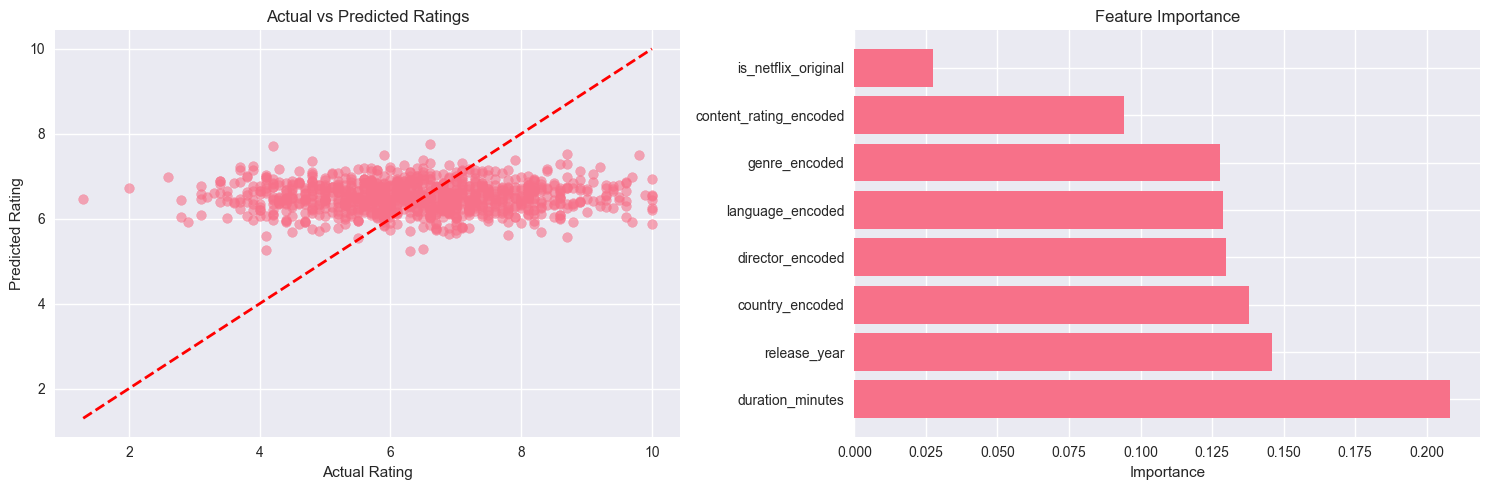

In [22]:
# Visualize model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Rating')
axes[0].set_ylabel('Predicted Rating')
axes[0].set_title('Actual vs Predicted Ratings')

# Feature importance
axes[1].barh(feature_importance['feature'], feature_importance['importance'])
axes[1].set_xlabel('Importance')
axes[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

## 6. Advanced Analytics and Insights

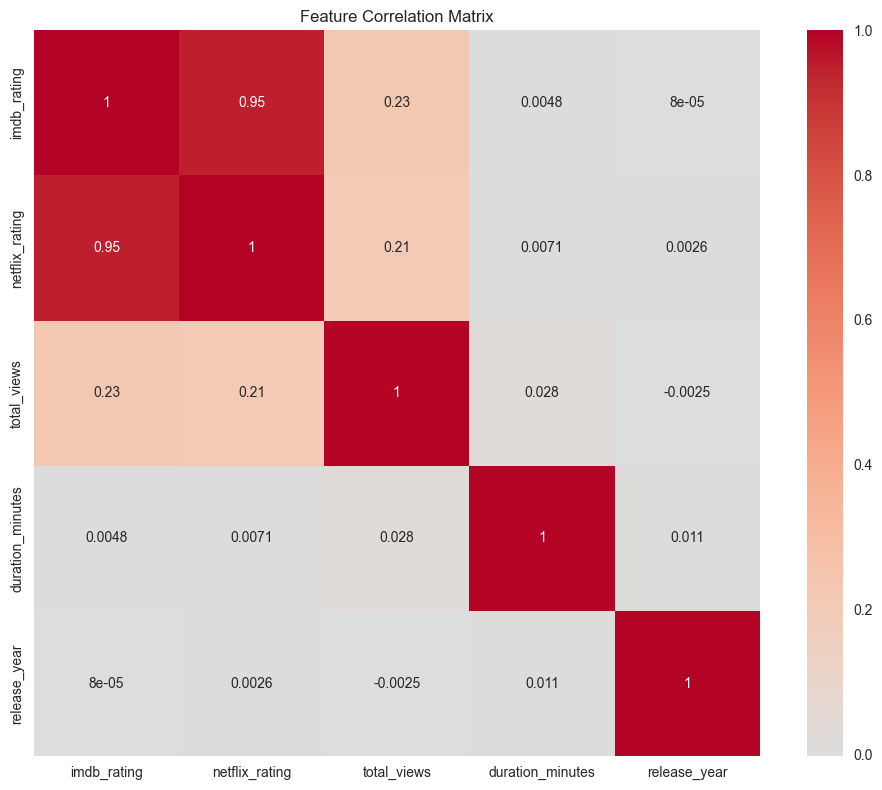

KEY INSIGHTS:
Average IMDB Rating: 6.47
Most popular genre: Action
Average movie duration: 130 minutes
Netflix Originals: 2483 (49.7%)
Countries represented: 20
Languages available: 16
Unique directors: 18


In [23]:
# Correlation analysis
numeric_columns = ['imdb_rating', 'netflix_rating', 'total_views', 'duration_minutes', 'release_year']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Key insights
print("KEY INSIGHTS:")
print(f"Average IMDB Rating: {df['imdb_rating'].mean():.2f}")
print(f"Most popular genre: {df['genre'].mode()[0]}")
print(f"Average movie duration: {df['duration_minutes'].mean():.0f} minutes")
print(f"Netflix Originals: {df['is_netflix_original'].sum()} ({df['is_netflix_original'].mean()*100:.1f}%)")
print(f"Countries represented: {df['country'].nunique()}")
print(f"Languages available: {df['language'].nunique()}")
print(f"Unique directors: {df['director'].nunique()}")

In [24]:
# Genre analysis
genre_analysis = df.groupby('genre').agg({
    'imdb_rating': ['mean', 'std', 'count'],
    'total_views': ['mean', 'sum'],
    'duration_minutes': 'mean'
}).round(2)

# Flatten column names
genre_analysis.columns = ['_'.join(col).strip() for col in genre_analysis.columns]
genre_analysis = genre_analysis.sort_values('imdb_rating_mean', ascending=False)

print("Genre Analysis:")
print(genre_analysis.head(10))

Genre Analysis:
             imdb_rating_mean  imdb_rating_std  imdb_rating_count  \
genre                                                               
Crime                    6.59             1.46                299   
War                      6.55             1.51                307   
Fantasy                  6.54             1.54                293   
Biography                6.54             1.39                290   
Sci-Fi                   6.54             1.42                306   
Drama                    6.53             1.67                319   
Documentary              6.52             1.50                322   
Romance                  6.50             1.52                305   
Mystery                  6.48             1.54                311   
Family                   6.46             1.47                327   

             total_views_mean  total_views_sum  duration_minutes_mean  
genre                                                                  
Crime      

In [25]:
# Director analysis
director_analysis = df.groupby('director').agg({
    'imdb_rating': 'mean',
    'title': 'count',
    'total_views': 'mean'
}).round(2)

# Filter directors with multiple movies
director_analysis = director_analysis[director_analysis['title'] >= 2]
director_analysis = director_analysis.sort_values('imdb_rating', ascending=False)

print("Top Directors (with 2+ movies):")
print(director_analysis.head(10))

Top Directors (with 2+ movies):
                       imdb_rating  title  total_views
director                                              
Chloe Zhao                    6.61    264     61486.26
Martin Scorsese               6.59    257     64578.65
Christopher Nolan             6.58    298     61838.94
Christopher McQuarrie         6.57    281     62447.21
Parasite Director             6.51    303     67473.84
David Fincher                 6.51    283     70222.29
Steven Spielberg              6.49    267     59999.75
Patty Jenkins                 6.48    286     66164.70
Bong Joon-ho                  6.45    273     62551.20
Ridley Scott                  6.45    281     64814.75


## 7. User Preference Analysis

In [26]:
def analyze_user_preferences(preferred_genres=None, min_rating=6.0, max_duration=150):
    """Analyze and recommend movies based on user preferences."""
    filtered_movies = df.copy()
    
    # Apply filters
    if preferred_genres:
        filtered_movies = filtered_movies[filtered_movies['genre'].isin(preferred_genres)]
        
    filtered_movies = filtered_movies[
        (filtered_movies['imdb_rating'] >= min_rating) &
        (filtered_movies['duration_minutes'] <= max_duration)
    ]
    
    # Calculate recommendation score
    filtered_movies['recommendation_score'] = (
        filtered_movies['imdb_rating'] * 0.4 +
        (filtered_movies['total_views'] / filtered_movies['total_views'].max()) * 10 * 0.3 +
        (2024 - filtered_movies['release_year']) * -0.1 + 5
    )
    
    recommendations = filtered_movies.nlargest(20, 'recommendation_score')
    
    return recommendations[['title', 'genre', 'director', 'imdb_rating', 'release_year', 'recommendation_score']]

# Example: User preferences
preferred_genres = ['Action', 'Thriller', 'Drama']
user_recs = analyze_user_preferences(
    preferred_genres=preferred_genres,
    min_rating=7.0,
    max_duration=130
)

print(f"Top recommendations for {preferred_genres} fans:")
print(user_recs.head(10))

Top recommendations for ['Action', 'Thriller', 'Drama'] fans:
            title     genre           director  imdb_rating  release_year  \
269   Hidden Moon  Thriller      David Fincher          9.5          2024   
1644        Quest  Thriller      David Fincher          7.7          2010   
1292        Storm     Drama       Greta Gerwig         10.0          2022   
1050     Big Moon  Thriller       Greta Gerwig          7.8          2023   
4130          Sky    Action       Bong Joon-ho          7.3          2016   
4523        Light     Drama         Chloe Zhao          8.9          2017   
2871          Sun    Action       Jordan Peele          9.4          2021   
2932         Hope     Drama       Bong Joon-ho          9.8          2021   
4368         Love  Thriller       Rian Johnson          8.2          2020   
3713         Tale    Action  Christopher Nolan          9.0          2018   

      recommendation_score  
269               9.692887  
1644              9.680000  
129

## 8. Conclusion:-

### Summary

This Netflix Movie Recommendation System demonstrates:

1. **Data Generation**: Created a realistic dataset with 5,000 movies
2. **Exploratory Data Analysis**: Comprehensive visualization and statistical analysis
3. **Content-Based Filtering**: Using TF-IDF and cosine similarity
4. **Machine Learning**: Random Forest for rating prediction
5. **Recommendation Engine**: Hybrid approach combining multiple techniques
6. **User Preferences**: Customizable filtering and recommendation

